In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
np.random.seed(1)
#Uncomment and set the path to the csv file below
file_path_jump = r'D:\visual studio code\project\EEN210-main\EEN210-main\repeated_jumping_20240205_155636.csv'
file_path_updown =r'D:\visual studio code\project\EEN210-main\EEN210-main\sitdown&up_20240205_155420.csv'
file_path_stand=r'D:\visual studio code\project\EEN210-main\EEN210-main\standing_20240205_155041.csv'
jump_data = pd.read_csv(file_path_jump)
updown_data = pd.read_csv(file_path_updown)
stand_data=pd.read_csv(file_path_stand)

jump_data["label"]=0
updown_data["label"]=1
stand_data["label"]=2
updown_data.head(100)


,acceleration_x,acceleration_y,acceleration_z,gyroscope_x,gyroscope_y,gyroscope_z,timestamp,label
0,-3446,-65,45,1434,332,-426,2024-02-05 15:54:21.580,1
1,-3556,-49,198,1538,383,-252,2024-02-05 15:54:21.640,1
2,-3471,-149,79,1525,-675,-72,2024-02-05 15:54:21.698,1
3,-3419,-39,30,1321,244,-256,2024-02-05 15:54:21.755,1
4,-3435,-265,82,1375,578,-932,2024-02-05 15:54:21.807,1
...,...,...,...,...,...,...,...,...
95,-1921,-25,3702,-359,147,-35,2024-02-05 15:54:26.982,1
96,-1959,-12,3813,-207,60,-185,2024-02-05 15:54:27.023,1
97,-1945,-38,3738,-33,-47,-114,2024-02-05 15:54:27.082,1
98,-1936,6,3761,45,551,-379,2024-02-05 15:54:27.151,1


In [5]:
columns = [
        "acceleration_x",
        "acceleration_y",
        "acceleration_z",
        "gyroscope_x",
        "gyroscope_y",
        "gyroscope_z",
    ]

data = pd.concat([jump_data, updown_data, stand_data])

# Preprocess the data
X = data.drop(['timestamp', 'label'], axis=1)  # Features
y = data['label']  # Target labels

# Convert the DataFrame to numpy arrays


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train[0])
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
print(X_train[0])

[ 0.47818814  0.35484147  2.30943308  0.14440012 -0.0360787   0.02124183]


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 25, class_weight="balanced")
# Fitting model
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Model accuracy
acc = accuracy_score(y_test, pred)*100
print('accuracy_score',acc)

# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))


accuracy_score 93.88888888888889
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.86      0.91      0.88        46
           2       0.95      0.95      0.95        78

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

# Assuming you've already prepared your data X_train, X_test, y_train, y_test

# Preprocess the data
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=25, class_weight="balanced")
rf_classifier.fit(X_train,y_train)

# Create OneVsRestClassifier
#ovr_classifier = OneVsRestClassifier(rf_classifier)

# Fit the model
#ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
#plot_roc_curve(rf_classifier, X_test, y_pred)
#plt.show()


ROC AUC Score: 0.9958368599934467


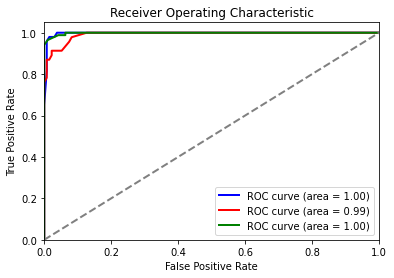

In [22]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']  # Colors for each class
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=25, class_weight="balanced")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.96428571 0.96428571 0.95238095 0.95238095 0.95238095]
Mean cross-validation score: 0.9571428571428571


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

#Model accuracy
acc = accuracy_score(y_test, dt_pred)*100
print('accuracy_score',acc)

# Classification Report
print('Classification Report')
print(classification_report(y_test, dt_pred))


Cross-validation scores: [0.94047619 0.94047619 0.92857143 0.94047619 0.89285714]
Mean cross-validation score: 0.9285714285714286
accuracy_score 92.77777777777779
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        56
           1       0.83      0.93      0.88        46
           2       0.99      0.95      0.97        78

    accuracy                           0.93       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.93      0.93      0.93       180



In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Fit the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9444444444444444
Precision: 0.9495726495726495
Recall: 0.9444444444444444
F1-score: 0.9452017284901383


In [2]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


ModuleNotFoundError: No module named 'tensorflow'